<h1 align="center">Classifying EU Sustainability Performance</h1>

<h2 align="center">Part 1. Data Exploration & Understanding</h2>

<h3 align="center"> 1.1. Loading and Data Wrangling </h3>
   

---
<b> <i> Description of the variables (methodology of the Europe Sustainable Development Report 2025)</i></b><br>

In [183]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_original = pd.read_csv("D:/Portfolio/Classifying EU Sustainability Performance/eu_sdg_performance_data.csv")

| Variable              | Description                                                    | Unit in dataset                                 |
| --------------------- | -------------------------------------------------------------- | ----------------------------------------------- |
| **year**              | Year of observation                                            | year (2015–2024)                                |
| **sdgi\_score**       | Overall SDG Index (aggregate sustainability performance score) | scale 0–100                                     |
| **performance\_tier** | Sustainability performance classification                      | 0 = Needs Improvement, 1 = Good, 2 = Leaders    |
| **sdg8\_income**      | Average income per capita (GDP per capita, PPP)                | € per person (≈ 8,800 – 39,000)                 |
| **sdg8\_unemp**       | Unemployment rate                                              | % of population (2 – 26%)                       |
| **sdg8\_inwork**      | Employment-to-population ratio                                 | % of population (3 – 19%)                       |
| **sdg9\_eurd**        | Expenditure on R\&D                                            | % of GDP (0 – 4%)                               |
| **sdg9\_digital**     | Basic digital skills of the population                         | % of population (28 – 83%)                      |
| **sdg9\_bband**       | Broadband internet coverage                                    | % of households (59 – 100%)                     |
| **sdg16\_cpi**        | Corruption Perception Index (Transparency International)       | scale 0–100 (34 – 91; higher = less corruption) |
| **sdg16\_rsf**        | Press Freedom Index (Reporters Without Borders)                | scale 0–100 (32 – 95; higher = freer press)     |
| **sdg16\_crime**      | Crime/Safety index                                             | normalized index 1–26 (lower = less crime)      |
| **sdg4\_tertiary**    | Population with tertiary education                             | % of adults (23 – 63%)                          |
| **sdg4\_adult**       | Adult participation in education/training                      | % of adults (1 – 39%)                           |
| **sdg7\_eurenew**     | Share of renewable energy in final energy consumption          | % (5 – 84%)                                     |
| **sdg13\_co2gcp**     | CO₂ emissions per capita                                       | tons CO₂ per person (≈ 3 – 16.6)                |
| **sdg5\_empgap**      | Gender employment gap                                          | % difference between men and women (0 – 43%)    |
| **sdg10\_gini**       | Gini coefficient (income inequality)                           | 21 – 45 (scale typical for Europe)              |


---
<b> <i> Distinct values of the variable Country </i></b></br>


In [184]:
countries = sorted(df_original["Country"].unique())
for c in countries:
    print(repr(c)) 
print("\nNumber of unique values in column 'Country':", df_original["Country"].nunique())

'Austria'
'Baltic States'
'Belgium'
'Bulgaria'
'Candidate Countries'
'Central and Eastern Europe'
'Croatia'
'Cyprus'
'Czechia'
'Denmark'
'EFTA Countries'
'Estonia'
'European Union'
'Finland'
'France'
'Germany'
'Greece'
'Hungary'
'Iceland'
'Ireland'
'Italy'
'Latvia'
'Lithuania'
'Luxembourg'
'Malta'
'Netherlands'
'North Macedonia'
'Northern Europe'
'Norway'
'Poland'
'Portugal'
'Romania'
'Serbia'
'Slovak Republic'
'Slovenia'
'Southern Europe'
'Spain'
'Sweden'
'Switzerland'
'TŸrkiye'
'United Kingdom'
'Western Europe'

Number of unique values in column 'Country': 42


---
</br>
<b> <i> "All in the same pot" =)</i></b></br>

</br>


In the prepared dataset, the Country column contained a mix of individual countries (e.g., Germany, Poland, Romania) and regional aggregations/unions (European Union, Baltic States, Candidate Countries, etc.). There are only 42 unique values of the variable "Country", 8 of which are not individual countries but Europe Subregions.

<b>Potential problems:</b>
1. <b>"Inconsistent Granularity".</b> The dataset contains information at two different levels: individual countries (low aggregation) and regional groups (high aggregation). This inconsistency can distort the analysis, as the model would be trained on data with varying levels of granularity.
2. <b>Alignment with Project Goal.</b> The main project goal is to identify the factors that influence the distribution of individual European countries across three levels. Including aggregated data that describes Europe Subregions contradicts this objective. Removing this data ensures the model focuses exclusively on the relevant features.
3. <b>Bias.</b> European subregions reflect only average indicators for entire regions and do not account for the unique characteristics of individual countries. Their inclusion may introduce bias, since the model would be trained on aggregated data that do not correspond to the actual classification targets.

Europe Subregions data simplifies the model and makes it more understandable. This allows us to be confident that the conclusions we draw from the model (for example, identifying key factors influencing the classification) truly relate to individual countries and not to the averaged characteristics of entire Europe Subregions. This makes our results more reliable and meaningful for decision-making.

So, <b>~340 observations</b> (34 countries × 10 years)

In [185]:
regions_to_exclude = [
    'Baltic States',
    'Candidate Countries',
    'Central and Eastern Europe',
    'EFTA Countries',
    'European Union',
    'Northern Europe',
    'Southern Europe',
    'Western Europe'
]
df= df_original[~df_original['Country'].isin(regions_to_exclude)].copy()
df_regions = df_original[df_original['Country'].isin(regions_to_exclude)].copy()

Replace the county's name:

In [186]:
df["Country"] = df["Country"].replace("TŸrkiye", "Turkey")

</br>For the following analysis, we need to properly impute all NaN values.
Let's find the number of NaN values and the countries/columns that contain them.

In [187]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 340 entries, 0 to 409
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           340 non-null    object 
 1   year              340 non-null    int64  
 2   sdgi_score        340 non-null    float64
 3   performance_tier  340 non-null    int64  
 4   sdg8_income       330 non-null    float64
 5   sdg8_unemp        330 non-null    float64
 6   sdg8_inwork       340 non-null    int64  
 7   sdg9_eurd         340 non-null    int64  
 8   sdg9_digital      330 non-null    float64
 9   sdg9_bband        340 non-null    int64  
 10  sdg16_cpi         340 non-null    int64  
 11  sdg16_rsf         340 non-null    int64  
 12  sdg16_crime       340 non-null    int64  
 13  sdg4_tertiary     340 non-null    int64  
 14  sdg4_adult        340 non-null    int64  
 15  sdg7_eurenew      310 non-null    float64
 16  sdg13_co2gcp      340 non-null    float64
 17  sd

In [188]:
nan_per_column = df.isnull().sum()
print("\nNaN per column:\n", nan_per_column)
total_nan = df.isnull().sum().sum()
print("\nTotal number of NaN:", total_nan)


NaN per column:
 Country              0
year                 0
sdgi_score           0
performance_tier     0
sdg8_income         10
sdg8_unemp          10
sdg8_inwork          0
sdg9_eurd            0
sdg9_digital        10
sdg9_bband           0
sdg16_cpi            0
sdg16_rsf            0
sdg16_crime          0
sdg4_tertiary        0
sdg4_adult           0
sdg7_eurenew        30
sdg13_co2gcp         0
sdg5_empgap         10
sdg10_gini           0
dtype: int64

Total number of NaN: 70


In [189]:
missing_dict = (
    df.drop(columns=["Country"])
      .groupby(df["Country"])
      .apply(lambda g: g.isna().any()[lambda x: x].index.tolist())
      .to_dict()
) 
missing_nonempty = {k: v for k, v in missing_dict.items() if v}
print("\nCountries with missing values (NaN):")
for country, cols in missing_nonempty.items():
    print(f"\t{country}: {cols}")



Countries with missing values (NaN):
	North Macedonia: ['sdg8_income']
	Switzerland: ['sdg7_eurenew']
	Turkey: ['sdg7_eurenew']
	United Kingdom: ['sdg8_unemp', 'sdg9_digital', 'sdg7_eurenew', 'sdg5_empgap']


---

<b> <i> "So what do we get instead?" </i></b></br>


Unfortunately, we cannot use real data from other sources (the World Bank or Eurostat), as the research methodologies different and the required data are simply unavailable.
That's why we will follow the strategy: <b>imputation will be based on the Europe Subregionals values</b>.

<b>df</b> — the main dataset with individual countries</br>
<b>df_regions</b> — the dataset with Europe Subregionals values (Candidate Countries, EFTA Countries, ...). 

The <b>df_regions</b> subset already contains <b>averaged indicators</b> for the corresponding country groups.</br> 
Therefore, <b>during imputation we will substitute the values for the respective year from the appropriate Europe Subregion</b> (according to "Full data base" info): missing values for ... from ...

- North Macedonia ← Candidate Countries
- Switzerland ← EFTA Countries
- Turkey ← Candidate Countries
- United Kingdom ← Western Europe

In [190]:
#This dictionary defines the mapping between an individual country and its Europe Subregion.
union_map = {
    'North Macedonia': 'Candidate Countries',
    'Switzerland': 'EFTA Countries',
    'Turkey': 'Candidate Countries',
    'United Kingdom': 'Western Europe',
}
#This dictionary specifies which variables are missing for each country
missing_nonempty

#We will create new function impute_from_unions
def impute_from_unions(df, df_regions, union_map, missing_nonempty,
                       country_col='Country', year_col='year'):
    out = df.copy()
    for country, cols in missing_nonempty.items():
        union = union_map.get(country)
        if not union:
            continue
        for col in cols:
            if col not in out.columns or col not in df_regions.columns:
                continue
            union_series = (
                df_regions[df_regions[country_col] == union][[year_col, col]]
                .dropna()
                .set_index(year_col)[col]
            )
            if union_series.empty:
                continue
            mask = (out[country_col] == country) & (out[col].isna())
            out.loc[mask, col] = out.loc[mask, year_col].map(union_series)
    return out

df = impute_from_unions(df, df_regions, union_map, missing_nonempty)

Let's revise the results of data preprocessing

In [191]:
total_nan = df.isnull().sum().sum()
print("\nTotal number of NaN:", total_nan)


Total number of NaN: 0


In [192]:
#We will save cleaned date to new CSV file:
df.to_csv("cleaned_data.csv", index=False, encoding="utf-8")

<h3 align="center"> 1.2. Exploratory Data Analysis for target variable performance_tier	</h3>

<b> <i> Statistics of performance_tier across countries</i></b></br>
According to the following plots, we can state the following summary for 2024 year:</br>
<b>0 – Sustainability Leaders:</b> represented by 6 countries.</br>
<b>1 – Good Performers:</b> represented by 22 countries.</br>
<b>2 – Need Improvement:</b> represented by 6 countries.</br>

<i>It is important to note that the analysis is conducted on data where regional groupings have been removed and missing values have already been imputed.</i>

In [193]:
tier_labels = {
    0: "0 - Sustainability Leaders",
    1: "1 - Good Performers",
    2: "2 - Need Improvement"
}

pivot_table = pd.pivot_table(
    df,
    index="performance_tier",
    columns="year",
    values="Country",
    aggfunc="count",
    fill_value=0
)
print(pivot_table)

year              2015  2016  2017  2018  2019  2020  2021  2022  2023  2024
performance_tier                                                            
0                   10     8     8     8     7     6     6     6     6     6
1                   20    22    21    21    22    22    22    22    23    22
2                    4     4     5     5     5     6     6     6     5     6


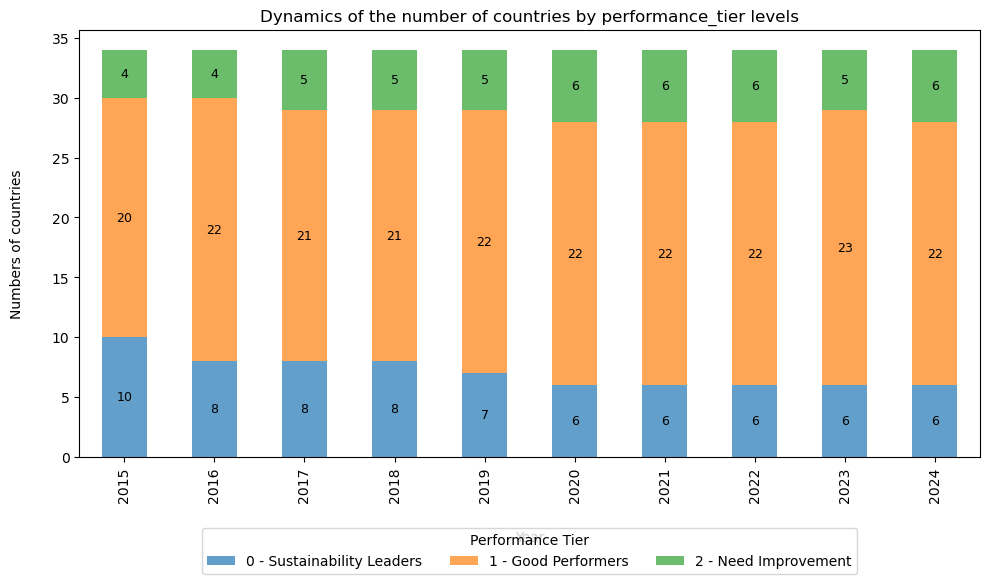

In [194]:
tier_labels = {
    0: "0 - Sustainability Leaders",
    1: "1 - Good Performers",
    2: "2 - Need Improvement"
}

pivot_table = pd.pivot_table(
    df,
    index="year",
    columns="performance_tier",
    values="Country",
    aggfunc="count",
    fill_value=0
)
fig, ax = plt.subplots(figsize=(10, 6))
bars = pivot_table.plot(kind="bar", stacked=True, ax=ax, alpha=0.7, zorder=1)
plt.title("Dynamics of the number of countries by performance_tier levels")
ax.legend(
    title="Performance Tier",
    labels=[tier_labels[col] for col in pivot_table.columns],
    loc="upper center",
    bbox_to_anchor=(0.5, -0.15),
    ncol=3
)
plt.xlabel("Year", labelpad=20)
plt.ylabel("Numbers of countries", labelpad=20)
for container in bars.containers:
    ax.bar_label(container, label_type="center", fontsize=9, color="black")
plt.grid(False)
plt.tight_layout()
plt.show()



<b> <i> Pearson Correlation Coefficients for performance_tier </i></b></br>

Based on the correlation analysis, it is possible to assess the degree of influence of individual factors on the target variable performance_tier.
The most influential factors include:</br>
<b>sdg16_cpi</b> – Corruption Perception Index (Transparency International)</br>
<b>sdg9_eurd</b> – Expenditure on R&D</br>
<b>sdg9_digital</b> – Basic digital skills of the population</br>
<b>sdg4_adult</b> – Adult participation in education/training</br>
<b>sdg16_rsf</b> – Press Freedom Index (Reporters Without Borders)</br>
<b>sdg8_income</b> – Average income per capita (GDP per capita, PPP)</br>
<b>sdg10_gini</b> – Gini coefficient (income inequality)</br>

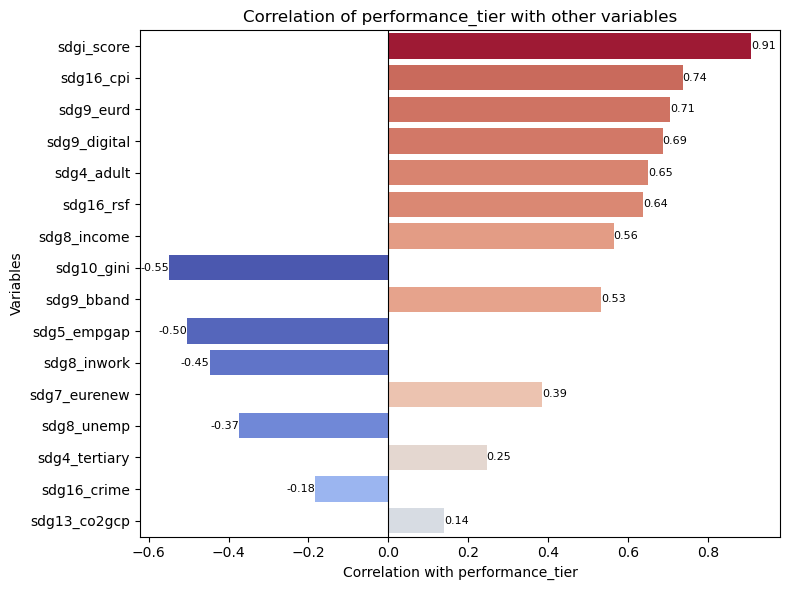

In [195]:

corr = df.corr(numeric_only=True)["performance_tier"].drop(["performance_tier", "year"])
corr = corr.reindex(corr.abs().sort_values(ascending=False).index)

plt.figure(figsize=(8, 6))
ax = sns.barplot(
    x=corr.values,
    y=corr.index,
    hue=corr.values,
    palette="coolwarm",
    dodge=False,
    legend=False
)

for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", fontsize=8)

plt.axvline(0, color="black", linewidth=0.8)
plt.xlabel("Correlation with performance_tier")
plt.ylabel("Variables")
plt.title("Correlation of performance_tier with other variables")
plt.tight_layout()
plt.show()

<Axes: xlabel='sdg16_cpi', ylabel='sdgi_score'>

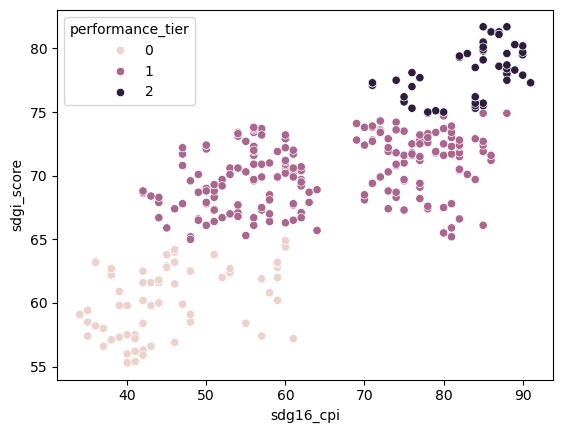

In [196]:
sns.scatterplot(data=df,  y="sdgi_score", x="sdg16_cpi", hue="performance_tier")



<h2 align="center">Part 2. </h2>

In [197]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

Prepare the data for modeling - Splitting data

In [198]:
X = df .drop(["performance_tier", "sdgi_score", "Country", "year"], axis=1) #delete targets_variabls and lables from X 
y = df ["performance_tier"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Instantiate the model
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
log_reg = LogisticRegression(solver="lbfgs", max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred=log_reg.predict(X_test)
f1 = metrics.f1_score(y_test, y_pred, average="weighted")
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("F1 (weighted):", f1)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8529411764705882
F1 (weighted): 0.8552283905688259
[[18  2  0]
 [ 4 56  6]
 [ 0  3 13]]
              precision    recall  f1-score   support

           0       0.82      0.90      0.86        20
           1       0.92      0.85      0.88        66
           2       0.68      0.81      0.74        16

    accuracy                           0.85       102
   macro avg       0.81      0.85      0.83       102
weighted avg       0.86      0.85      0.86       102



The model distinguishes classes 0 (Needs Improvement) and 1 (Good Performers) very well.
The main challenges are with class 2 (Leaders): there are fewer examples in the dataset, and some of them are misclassified as “Good Performers.”
Overall, the model demonstrates high performance (Accuracy ~0.85, F1 ~0.86), exceeding the required threshold of 0.75 specified in the project.

In [199]:
# Масив коефіцієнтів: [n_classes x n_features]
coefs = log_reg.coef_

# Таблиця з ознаками та їх середнім впливом (по модулях)
coef_df = pd.DataFrame({
    "Feature": X.columns,
    "MeanAbsCoef": np.mean(np.abs(coefs), axis=0)  # середній абсолютний коеф по класах
}).sort_values(by="MeanAbsCoef", ascending=False)

print(coef_df.head(10))

          Feature  MeanAbsCoef
4    sdg9_digital     1.036057
3       sdg9_eurd     0.864484
7       sdg16_rsf     0.850876
6       sdg16_cpi     0.827940
13    sdg5_empgap     0.806516
9   sdg4_tertiary     0.765447
8     sdg16_crime     0.749542
0     sdg8_income     0.737146
11   sdg7_eurenew     0.606830
14     sdg10_gini     0.525476


Overlap:
    sdg9_digital (digitalization)
    sdg9_eurd (innovation & R&D)
    sdg16_cpi (anti-corruption)
These factors emerged as key both from simple correlation analysis and from the logistic regression model.

Differences:
Logistic regression additionally highlighted:
    sdg16_rsf (rule of law / freedom of speech)
    sdg5_empgap (gender employment gap)
Correlation, on the other hand, emphasized:
    sdg4_adult (adult education)
    sdg9_bband (broadband Internet access).